In [3]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
Y = boston.target
X.shape

(506, 13)

In [4]:
X[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
from sklearn.linear_model import LinearRegression
import time
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 3)
model = LinearRegression(normalize = True)

start = time.perf_counter()
model.fit(X_train,Y_train)

train_score = model.score(X_train,Y_train)
cv_score = model.score(X_test,Y_test)

print('elaspe:{0:.6f};train_score:{1:.6f};cv_socre:{2:.6f}'.format(time.perf_counter()-start,train_score,cv_score))#打印所用时间，训练测试集分数

elaspe:0.029628;train_score:0.723941;cv_socre:0.794958


In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def polynomial_model(degree = 1):
    polynomial_features = PolynomialFeatures(degree = degree,include_bias = False)
    linear_regression = LinearRegression(normalize=True)
    pipeline = Pipeline([("polynomial_feature",polynomial_features),("linear_regression",linear_regression)])
    return pipeline

model = polynomial_model(degree = 2)
start = time.perf_counter()
model.fit(X_train,Y_train)
train_score = model.score(X_train,Y_train)
cv_score = model.score(X_test,Y_test)

print('elaspe:{0:.6f};train_score:{1:.6f};cv_socre:{2:.6f}'.format(time.perf_counter()-start,train_score,cv_score))#打印所用时间，训练测试集分数



elaspe:0.010332;train_score:0.930547;cv_socre:0.860465


elaspe:1.588570


<Figure size 3600x800 with 0 Axes>

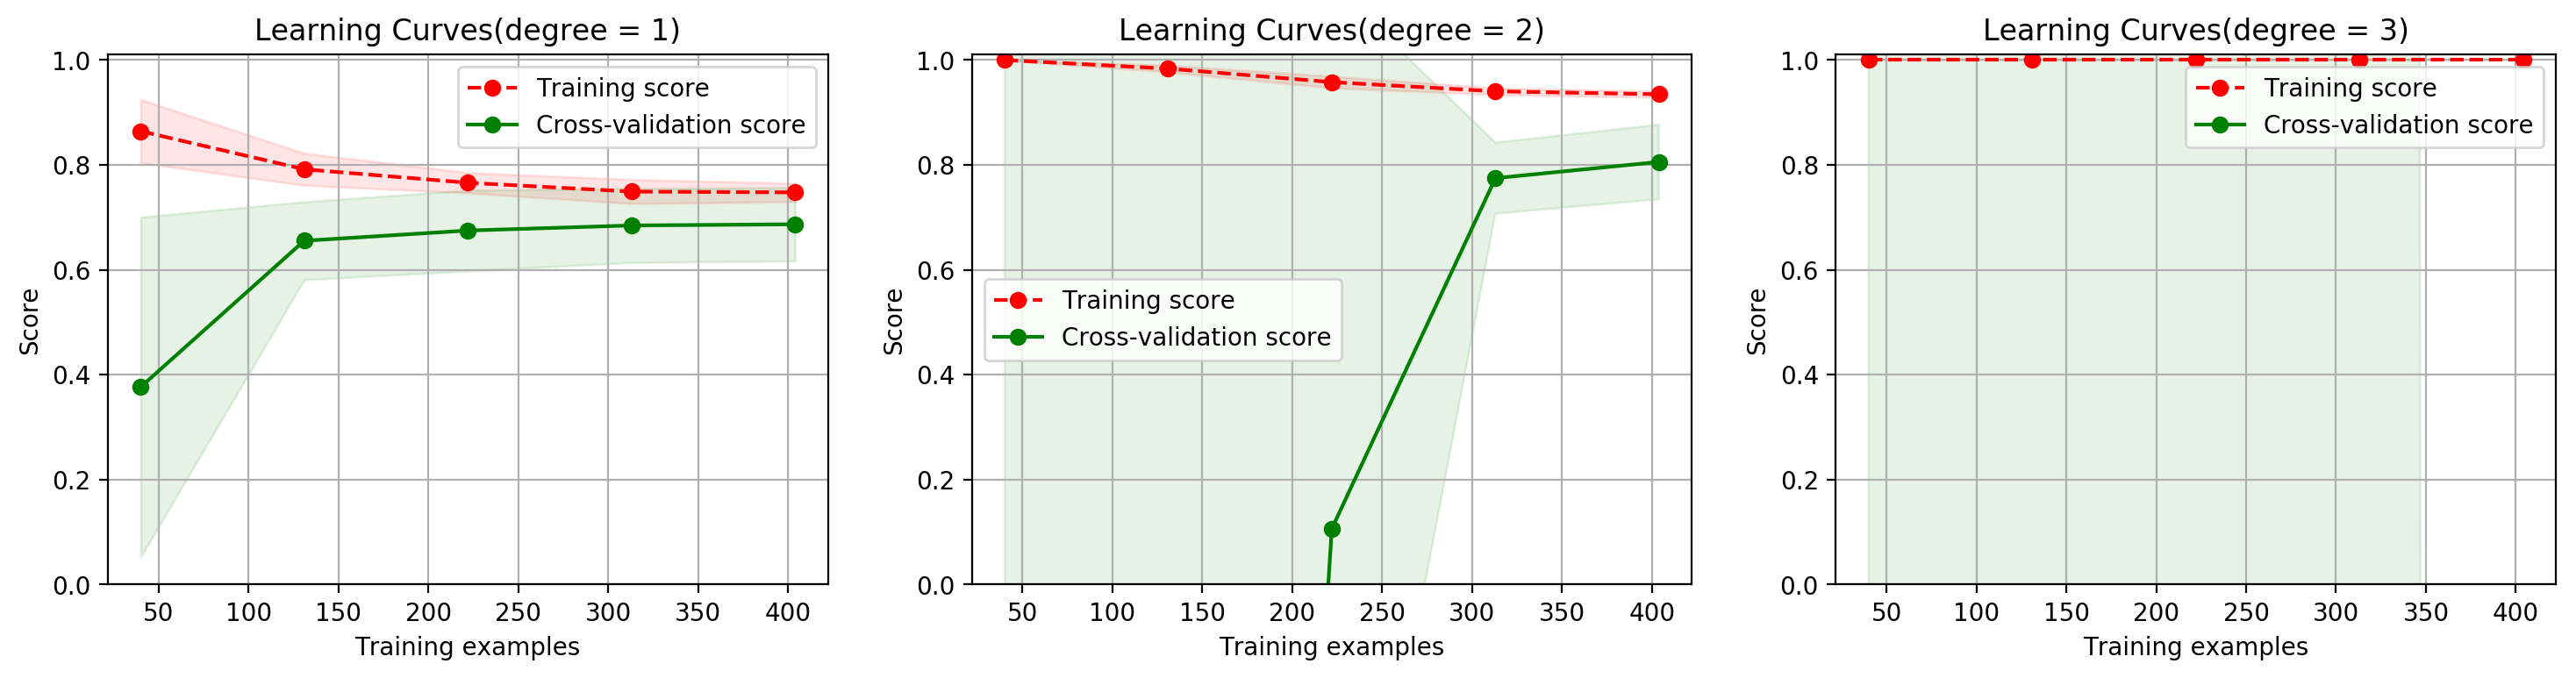

In [14]:
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit
from matplotlib import pyplot as plt
import time


cv = ShuffleSplit(n_splits = 10,test_size = 0.2,random_state=0)
plt.figure(figsize = (18,4),dpi = 200)
title = 'Learning Curves(degree = {0})'

degrees = [1,2,3]

start = time.perf_counter()

plt.figure(figsize = (18,4),dpi=200)
for i in range(len(degrees)):
    plt.subplot(1,3,i+1)
    plot_learning_curve(plt,polynomial_model(degrees[i]),title.format(degrees[i]),X,Y,ylim = (0,1.01),cv = cv)

print('elaspe:{0:.6f}'.format(time.perf_counter()-start))
    